In [7]:
from ml_model import nn
from numerical_model import lorenz96

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Avg Error across 40 components')

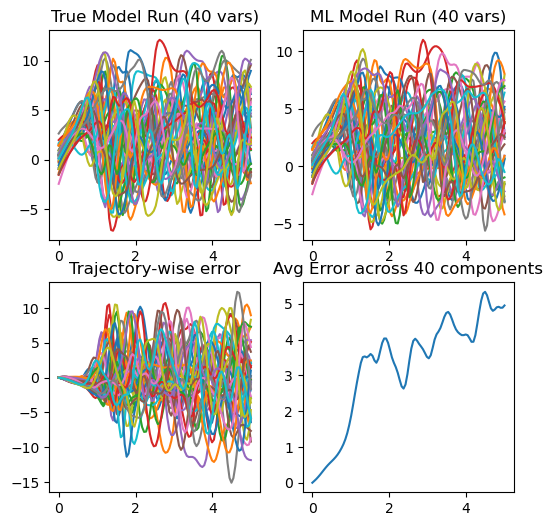

In [37]:
# Time step for the ML model; use the same for the numerical integration
dt = 0.05
n_steps = 100

# Generate a random state
x0 = np.random.randn(40)

x = x0
x_ml = np.zeros((n_steps, 40))
x_ml[0] = x0
for i in range(1, n_steps):
    x = nn._smodel.predict(x.reshape((1, 40, 1)))[0, :, 0]
    x_ml[i] = x

x_phys = solve_ivp(lorenz96, [0, n_steps*dt], x0, t_eval=np.arange(0.0, n_steps*dt, dt)).y.T

time = np.linspace(0, dt * n_steps, x_phys.shape[0])
# plot physical trajectory, nn trajectory and error with time on the x-axis
fig, ax = plt.subplots(2,2, figsize=(6,6))
ax[0,0].plot(time, x_phys)
ax[0,0].set_title("True Model Run (40 vars)")
ax[0,1].plot(time, x_ml)
ax[0,1].set_title("ML Model Run (40 vars)")
ax[1,0].plot(time, x_ml-x_phys)
ax[1,0].set_title("Trajectory-wise error")

ax[1,1].plot(time, np.sqrt(((x_ml - x_phys)**2).mean(axis=1)))
ax[1,1].set_title("Avg Error across 40 components")


## Notation
The `Lorenz96` model, named after it's founder, Ed Lorenz, in 1996, is a dynamical system that mimics the state of the atmosphere at 40 equally spaced points around a latitude band. For the earth, the high rotation rate and thin atmosphere result in a system where the dominant direction of motion is East-West, not North-South, and thus the one-dimensional approximation is perhaps to first order somewhat reasonable.  Examining the 40 ordinary differential equations, 
$$ \frac{dx_i}{dt} = (x_{i+1}- x_{i-2})\cdot x_{i-1} - x_i + F$$ 
We see three terms added together. The first is an asymetric interaction term that evolves the state at the current location based on its neighbors; this models the advective dynamics of the atmosphere, while the other two terms, $-x_i$ and $F$ correspond to forcing term. Here we can imagine that $-x_i$ is a dissipation term, e.g., outgoing longwave radiation, while $+F$, is forcing, e.g., solar insolation, that is added to the system. The value $F=8$ is used in our project because it has been shown to generate chaotic behavior.

## EKI

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
       2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 ,
       2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.2 , 3.25,
       3.3 , 3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 , 3.65, 3.7 , 3.75, 3.8 ,
       3.85, 3.9 , 3.95, 4.  , 4.05, 4.1 , 4.15, 4.2 , 4.25, 4.3 , 4.35,
       4.4 , 4.45, 4.5 , 4.55, 4.6 , 4.65, 4.7 , 4.75, 4.8 , 4.85, 4.9 ,
       4.95, 5.  ])

In [28]:
dt*n_steps

5.0